In [3]:
import numpy as np
from numpy.random import RandomState
import pandas as pd
from pyod.models.knn import KNN
from pyod.models.auto_encoder import AutoEncoder
from pyod.utils.data import generate_data
#from pyod.utils.data import evaluate_print
#from pyod.utils.example import visualize

In [4]:
df = pd.read_csv('/content/dataset.csv')
df.drop(columns = df.columns[0], axis = 1, inplace= True)
df

,abs_energy,absolute_maximum,absolute_sum_of_changes,entropy,std_dev,mean,maximum,minimum,variance
0,221.437546,0.168655,0.872831,10.221889,0.072825,0.051336,0.152995,-0.168655,0.005303
1,741.992624,0.657691,0.998292,7.278648,0.190928,0.473949,0.657691,0.000000,0.036453
2,215.017591,0.151294,0.818038,10.273905,0.062622,0.055313,0.151294,-0.136116,0.003922
3,0.024245,0.012161,0.027161,6.949115,0.003266,0.001553,0.012161,-0.000059,0.000011
4,5563.474481,0.609106,1.484023,9.341832,0.219271,0.364441,0.609106,-0.011398,0.048080
...,...,...,...,...,...,...,...,...,...
92,729.381259,0.658118,1.006988,7.268408,0.201389,0.464657,0.658118,0.000000,0.040557
93,19.016123,0.171719,0.777555,7.824046,0.056711,0.066260,0.125276,-0.171719,0.003216
94,222.830481,0.156757,0.823547,10.350288,0.062649,0.053523,0.156757,-0.154710,0.003925
95,256.720418,0.156280,0.821429,10.213762,0.065018,0.071439,0.156280,-0.152702,0.004227


In [5]:
rng = RandomState()

X_train = df.sample(frac=0.7, random_state=rng)
X_test = df.loc[~df.index.isin(X_train.index)]

print(X_train.shape)
print(X_test.shape)


(68, 9)
(29, 9)


In [6]:
#When you do unsupervised learning, it is always a safe step to standardize the predictors
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler() 
scaler.fit(X_train)    # Only the training data are used to fit the scaler transformation,
X_train_scaled = scaler.transform(X_train) 
X_test_scaled = scaler.transform(X_test)  # then the scaler is used to transform the test input data.
X_train_scaled = pd.DataFrame(X_train_scaled)
X_test_scaled = pd.DataFrame(X_test_scaled)

X_train_scaled

,0,1,2,3,4,5,6,7,8
0,-0.261770,-0.223866,0.242548,-0.795210,-0.074458,-0.254219,-0.122676,-0.225125,-0.263612
1,-0.261159,-0.204012,0.070828,-0.853892,-0.079350,-0.180324,-0.102219,-0.310710,-0.266370
2,-0.153538,-0.297207,0.099715,1.088903,-0.171557,-0.291655,-0.198242,-0.200828,-0.316388
3,7.328466,3.509876,1.018827,0.199348,3.052903,3.998296,3.724352,1.414465,3.658008
4,-0.106300,-0.177218,0.052269,1.017116,-0.006456,-0.136146,-0.074613,-0.236419,-0.224177
...,...,...,...,...,...,...,...,...,...
63,-0.226138,-0.580311,-0.568397,0.967731,-0.611477,-0.403331,-0.489936,0.648109,-0.503450
64,-0.274881,-1.067682,-1.857695,-1.599634,-1.280287,-0.675226,-0.992094,1.413779,-0.624460
65,-0.274877,-1.072583,-1.866274,-1.316543,-1.269388,-0.667372,-0.997144,1.413739,-0.624068
66,-0.116897,-0.172775,0.129177,1.041444,-0.082541,-0.177662,-0.070034,-0.220941,-0.268164


         PC1       PC2
0  -0.390969 -0.015176
1  -0.391625 -0.090808
2  -0.577965  0.770082
3   9.861319 -1.759832
4  -0.305272  0.709397
..       ...       ...
63 -1.279838 -0.196663
64 -2.376474 -2.575769
65 -2.381796 -2.447608
66 -0.351865  0.753933
67 -0.490218  0.745170

[68 rows x 2 columns]


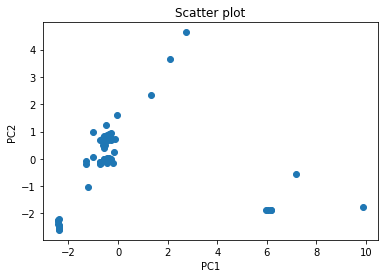

In [25]:
from sklearn.decomposition import PCA
pca = PCA(2)
x_pca = pca.fit_transform(X_train_scaled)
x_pca = pd.DataFrame(x_pca)
x_pca.columns=['PC1','PC2']
x_pca.head()
print(x_pca)
# Plot
import matplotlib.pyplot as plt
plt.scatter(x_pca['PC1'], x_pca['PC2']) 
plt.title('Scatter plot')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.show()

In [26]:
clf1 = AutoEncoder(hidden_neurons =[25, 2, 2, 25])
clf1.fit(X_train_scaled)

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 9)                 90        
                                                                 
 dropout (Dropout)           (None, 9)                 0         
                                                                 
 dense_1 (Dense)             (None, 9)                 90        
                                                                 
 dropout_1 (Dropout)         (None, 9)                 0         
                                                                 
 dense_2 (Dense)             (None, 25)                250       
                                                                 
 dropout_2 (Dropout)         (None, 25)                0         
                                                                 
 dense_3 (Dense)             (None, 2)                 5

AutoEncoder(batch_size=32, contamination=0.1, dropout_rate=0.2, epochs=100,
      hidden_activation='relu', hidden_neurons=[25, 2, 2, 25],
      l2_regularizer=0.1,
      loss=<function mean_squared_error at 0x7f61580e08c0>,
      optimizer='adam', output_activation='sigmoid', preprocessing=True,
      random_state=None, validation_size=0.1, verbose=1)

In [31]:
y_train_scores = clf1.decision_scores_  # raw outlier scores

# get the prediction on the test data
y_test_pred = clf1.predict(X_test_scaled)  # outlier labels (0 or 1)
# clf.decision_function: Predict raw anomaly score of X using the fitted detector.
y_test_scores = clf1.decision_function(X_test_scaled)  # outlier scores

y_test_pred = pd.Series(y_test_pred) # 0 or 1
y_test_scores = pd.Series(y_test_scores)

y_test_pred.value_counts()


1/1 [==============================] - 0s 29ms/step


0    24
1     5
dtype: int64

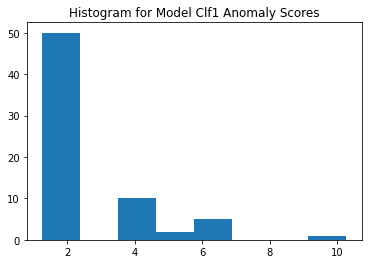

In [34]:
import matplotlib.pyplot as plt
plt.hist(y_train_scores, bins='auto')  # arguments are passed to np.histogram
plt.title("Histogram for Model Clf1 Anomaly Scores")
plt.show()

In [48]:
df_test = X_test_scaled.copy()
df_test['score'] = y_test_scores
df_test['cluster'] = np.where(df_test['score']<3, 0, 1) # cluster 0 is the normal and 1 is the one with error

print(df_test['cluster'].value_counts())

df_test.groupby('cluster').mean()

0    21
1     8
Name: cluster, dtype: int64


,0,1,2,3,4,5,6,7,8,score
cluster,,,,,,,,,,
0,-0.148744,-0.105531,0.229235,0.376445,-0.031456,-0.134285,-0.078027,-0.377125,-0.233478,1.569859
1,0.532356,1.295775,-0.384111,-1.275859,1.039968,1.679915,1.443073,1.414217,1.363924,5.387487


In [49]:
df0 = pd.read_csv('/content/dataset_file0.csv')
df0.drop(columns = df0.columns[0], axis = 1, inplace= True)
X_test_scaled0 = scaler.transform(df0)  # then the scaler is used to transform the test input data.

y_test_scores0 = clf1.decision_function(X_test_scaled0)  # outlier scores
y_test_pred0 = clf1.predict(X_test_scaled0)
(y_test_pred0)

1/1 [==============================] - 0s 23ms/step


array([0])

In [50]:
df1 = pd.read_csv('/content/dataset_file_fail.csv')
df1.drop(columns = df1.columns[0], axis = 1, inplace= True)
X_test_scaled1 = scaler.transform(df1)  # then the scaler is used to transform the test input data.

y_test_scores1 = clf1.predict(X_test_scaled1)  # outlier scores
y_test_pred1 = clf1.predict(X_test_scaled1)
y_test_scores1

1/1 [==============================] - 0s 21ms/step


array([1])